In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
df = pd.read_csv('student_data_large.csv')

In [5]:
print("Dataset Overview:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nBasic Statistics:\n{df.describe()}")


Dataset Overview:
Shape: (100, 8)

Columns: ['Name', 'Age', 'Height', 'Course', 'Is_Student', 'Monthly_Sales', 'Watch_Time_Hours', 'Weather_Preference']

Data Types:
Name                   object
Age                     int64
Height                float64
Course                 object
Is_Student              int64
Monthly_Sales           int64
Watch_Time_Hours        int64
Weather_Preference     object
dtype: object

Missing Values:
Name                  0
Age                   0
Height                0
Course                0
Is_Student            0
Monthly_Sales         0
Watch_Time_Hours      0
Weather_Preference    0
dtype: int64

Basic Statistics:
              Age      Height  Is_Student  Monthly_Sales  Watch_Time_Hours
count  100.000000  100.000000       100.0     100.000000        100.000000
mean    21.100000    5.687000         1.0   28232.430000         22.150000
std      2.315953    0.336847         0.0    7308.790371          7.342109
min     18.000000    5.000000         1

In [6]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))


<Figure size 2000x1500 with 0 Axes>

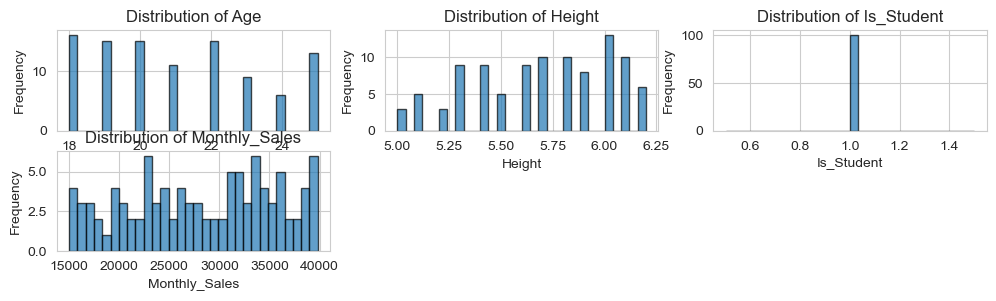

In [7]:
# 1. Distribution of numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(4, 3, i)
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

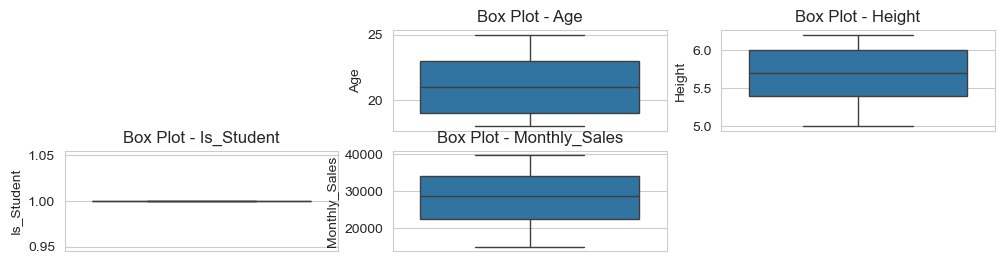

In [8]:
# 2. Box plots for outlier detection
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(4, 3, i + 4)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot - {col}')

Text(0.5, 1.0, 'Correlation Heatmap')

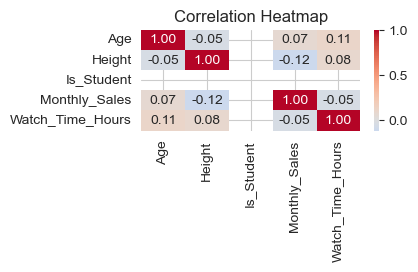

In [16]:
# 3. Correlation heatmap
plt.subplot(4, 3, 9)
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')


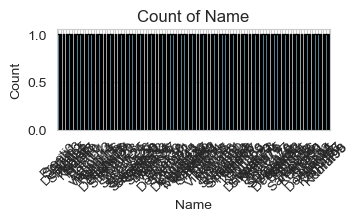

In [10]:
# 4. Categorical data analysis (if exists)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    plt.subplot(4, 3, 10)
    df[categorical_cols[0]].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Count of {categorical_cols[0]}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')


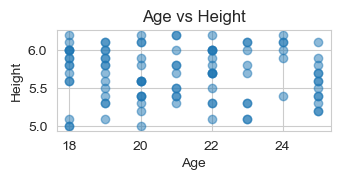

In [11]:
# 5. Scatter plot (first two numeric columns)
if len(numeric_cols) >= 2:
    plt.subplot(4, 3, 11)
    plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.5)
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.title(f'{numeric_cols[0]} vs {numeric_cols[1]}')

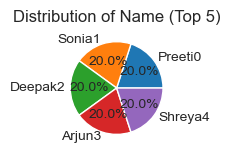

In [12]:
# 6. Pie chart for categorical distribution
if len(categorical_cols) > 0:
    plt.subplot(4, 3, 12)
    df[categorical_cols[0]].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {categorical_cols[0]} (Top 5)')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [14]:
# additional detailed analysis
print("DETAILED ANALYSIS:")

# Statistical summary for each numeric column
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")

# Categorical analysis
for col in categorical_cols:
    print(f"\n{col} - Unique Values: {df[col].nunique()}")
    print(df[col].value_counts().head())

DETAILED ANALYSIS:

Age:
  Mean: 21.10
  Median: 21.00
  Std Dev: 2.32
  Min: 18.00
  Max: 25.00

Height:
  Mean: 5.69
  Median: 5.70
  Std Dev: 0.34
  Min: 5.00
  Max: 6.20

Is_Student:
  Mean: 1.00
  Median: 1.00
  Std Dev: 0.00
  Min: 1.00
  Max: 1.00

Monthly_Sales:
  Mean: 28232.43
  Median: 28674.00
  Std Dev: 7308.79
  Min: 15027.00
  Max: 39810.00

Watch_Time_Hours:
  Mean: 22.15
  Median: 22.50
  Std Dev: 7.34
  Min: 10.00
  Max: 35.00

Name - Unique Values: 100
Name
Preeti0    1
Sonia1     1
Deepak2    1
Arjun3     1
Shreya4    1
Name: count, dtype: int64

Course - Unique Values: 4
Course
BBA      27
BScIT    26
BTech    24
BCA      23
Name: count, dtype: int64

Weather_Preference - Unique Values: 3
Weather_Preference
Rainy    36
Sunny    34
Cold     30
Name: count, dtype: int64
